what I did 
Ducement for code

# highlight  !SUBARCTIC_WINTER!

What we measument the PWV 
    observe six points of the sky which is some sharp curve of PWV
    to fit the Different PWV values modeling 
    so we can know the PWV influcen on our really observation bandwidth 



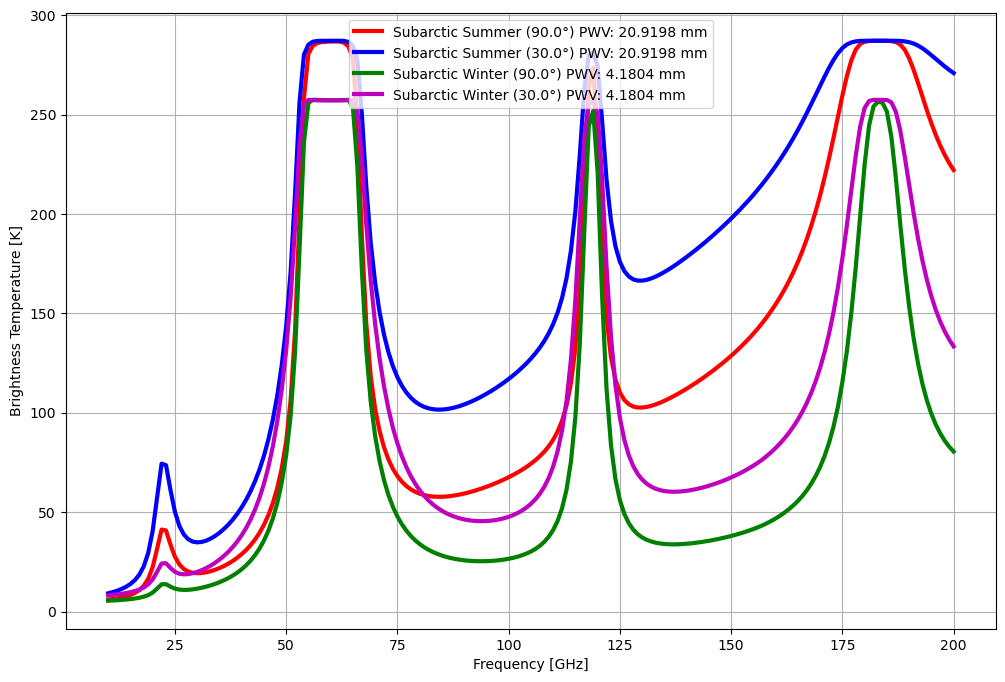

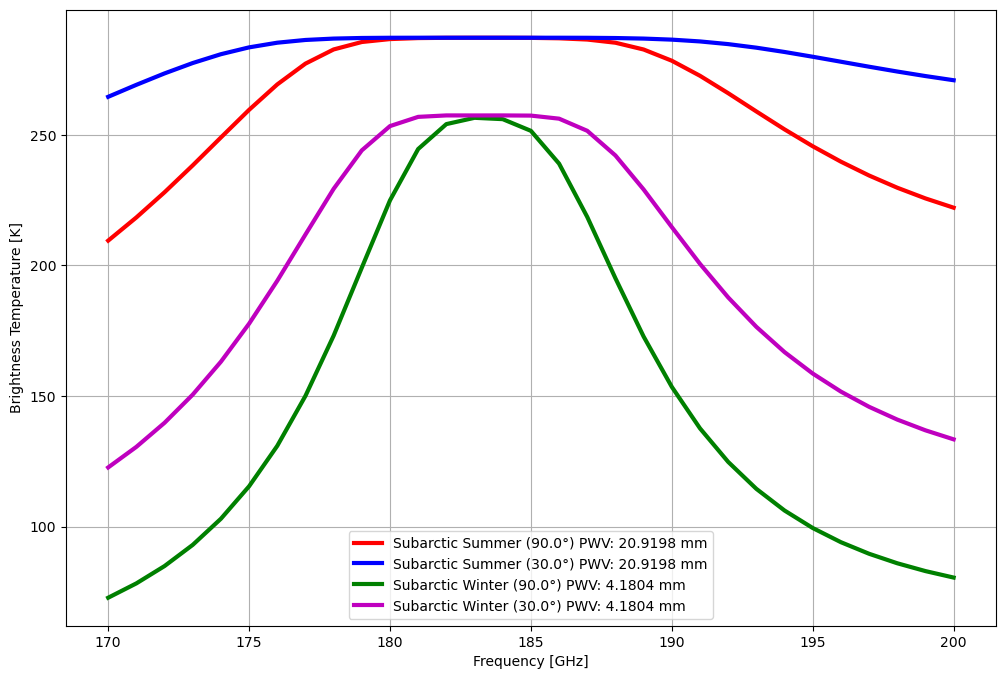

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp

from pyrtlib.tb_spectrum import TbCloudRTE

from pyrtlib.utils import ppmv2gkg, mr2rh

def sumInte4const(X,s):
    """ this function is used to compute path-integrated quantities for constant X
    Use Trapezoidal rule
    """
    
    sumInte = 0

    for i in range(len(s)-1):

        # fix the negative out set delta s is positive

        del_s = np.abs( s[i+1]-s[i] ) 
        sum_X = X[i+1] + X[i] 

        sumInte += 0.5* sum_X * del_s 
    

    return sumInte

def PWV_from_mmix(rho,g,m_mix_kgkg,p_pa):
    """
    Calculate the precipitable water vapor from the mixing ratio.


    input:
        rho_w in kg/m^3
        g in m/s^2
        mass mixing ratio of water vapor in kg/kg
        pressure in Pa
        
    output:
        PWV in mm
    """
    sum_m_P_rho = sumInte4const(m_mix_kgkg,p_pa) 
    
    
    PWV_meter = sum_m_P_rho / (g*rho) # in m

    PWV = PWV_meter * 1000 # convert to mm

    return PWV


atms = [atmp.SUBARCTIC_SUMMER, atmp.SUBARCTIC_WINTER]

g = 9.81 # m/s^2

colors = ['r', 'b', 'g', 'm']

cnt = 0

for atm in atms:

    z, p, _, t, md = atmp.gl_atm(atm)
    md_H2O = md[:,atmp.H2O]

    p_pa = p*1e2 # convert to Pa

    m_mix_gkg = ppmv2gkg(md_H2O,atmp.H2O) # convert to g/kg
    m_mix_kgkg = m_mix_gkg * 1e-3 # convert to kg/kg (g/g?)

    rho_w_liq = 1000 #kg/m^3
    PWV = PWV_from_mmix(rho_w_liq,g,m_mix_kgkg,p_pa)
    PWV = np.round(PWV,4)
    
    rhum = mr2rh(p, t, m_mix_gkg)[0] / 100
    frq = np.arange(10, 201, 1)
    ang = np.array([90., 30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rhum, frq, np.array([a]))

        rte.init_absmdl('R16')
       
        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)' + ' PWV: ' 
                        + str(PWV) + ' mm', 
                        lw=3, legend=True, color=colors[cnt], grid=True)
        cnt += 1


plt.show()
cnt = 0

for atm in atms:

    z, p, _, t, md = atmp.gl_atm(atm)
    md_H2O = md[:,atmp.H2O]

    p_pa = p*1e2 # convert to Pa

    m_mix_gkg = ppmv2gkg(md_H2O,atmp.H2O) # convert to g/kg
    m_mix_kgkg = m_mix_gkg * 1e-3 # convert to kg/kg (g/g?)

    rho_w_liq = 1000 #kg/m^3
    PWV = PWV_from_mmix(rho_w_liq,g,m_mix_kgkg,p_pa)
    PWV = np.round(PWV,4)
    
    rhum = mr2rh(p, t, m_mix_gkg)[0] / 100
    frq = np.arange(170, 201, 1)
    ang = np.array([90., 30.])

    for a in ang:
        rte = TbCloudRTE(z, p, t, rhum, frq, np.array([a]))

        rte.init_absmdl('R16')
       
        rte.satellite = False
        
        df = rte.execute()

        df = df.set_index(frq)
        df.tbtotal.plot(figsize=(12, 8), xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]",
                        label=atmp.atm_profiles()[atm] + ' (' + str(a) + '°)' + ' PWV: ' 
                        + str(PWV) + ' mm', 
                        lw=3, legend=True, color=colors[cnt], grid=True)
        cnt += 1


plt.show()